In [260]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
import xgboost as xgb
import re

### I Méthode Holdout

In [261]:
# On pourra aussi utiliser "df_for_cv_o_n.pkl"
# df_for_cv_interaction_and_dummies = pd.read_pickle("df_for_cv_interaction_and_dummies.pkl")

# OU 

# On va utiliser:
# - df_train_for_cv_o_n_all_variables.pkl
# - df_test_kaggle_cv_o_n_all_variables.pkl

df_train_for_cv_used = pd.read_pickle("../data/df_train_for_cv_o_n_all_variables.pkl")

all_var_x = [each for each in list(df_train_for_cv_used) if each != "count" and each != "datetime"]

# df_for_cv_interaction_and_dummies.shape
X_train = df_train_for_cv_used[all_var_x]
Y_train = df_train_for_cv_used[["count"]]

Exclusion des variables Quartiles et des variables "Special"

In [262]:
X_train.shape

(10886, 49)

In [263]:
list(X_train)

['CN_school',
 'CN_soleilQ',
 'CN_tendance_1Q',
 'CN_tendance_2Q',
 'CO_atempQ',
 'CO_day',
 'CO_holiday',
 'CO_humidityQ',
 'CO_month',
 'CO_season',
 'CO_tempQ',
 'CO_weather',
 'CO_windspeedQ',
 'CO_workingday',
 'NN_soleil',
 'NN_tendance_1',
 'NN_tendance_2',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'S_casual',
 'S_casualQ',
 'S_rateregis',
 'S_rateregisQ',
 'S_registered',
 'S_registeredQ',
 'CO_hour',
 'CO_year',
 'CO_day_labels_encoding',
 'CO_month_labels_encoding',
 'CO_season_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_hour_labels_encoding',
 'CO_year_labels_encoding',
 'CO_hour_int',
 'CO_hour_mean_encoding',
 'CO_month_mean_encoding',
 'CO_day_mean_encoding',
 'CO_hour_ordinal_encoding',
 'CO_month_ordinal_encoding',
 'CO_day_ordinal_encoding',
 'CO_weather_ordinal_encoding',
 'CO_season_ordinal_encoding',
 'CO_year_ordinal_encoding',
 'CN_type_of_day',
 'CN_week_end',
 'NN_soleil_binned',
 'NO_temp_binned']

In [264]:
# variables_to_keep = [each for each in list(X_train) if each[0] != 'S' and each[-1] != 'Q']
# X_train = X_train[variables_to_keep]

## XGBoost valeurs par défaut

In [265]:
X_train.shape

(10886, 49)

In [266]:
# Calcul des Y = log(Y + 1)
Y_train['log_count'] = Y_train['count'].map(lambda x: np.log1p(x))
Y_train = Y_train.drop("count", axis = 1)

/home/osboxes/anaconda3/envs/data/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Création "train" + "validation" = méthode Holdout

In [267]:
X_train.shape

(10886, 49)

In [225]:
Y_train.sample(n=2)

,log_count
3362,3.637586
7148,3.663562


In [268]:
list(X_train)

['CN_school',
 'CN_soleilQ',
 'CN_tendance_1Q',
 'CN_tendance_2Q',
 'CO_atempQ',
 'CO_day',
 'CO_holiday',
 'CO_humidityQ',
 'CO_month',
 'CO_season',
 'CO_tempQ',
 'CO_weather',
 'CO_windspeedQ',
 'CO_workingday',
 'NN_soleil',
 'NN_tendance_1',
 'NN_tendance_2',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'S_casual',
 'S_casualQ',
 'S_rateregis',
 'S_rateregisQ',
 'S_registered',
 'S_registeredQ',
 'CO_hour',
 'CO_year',
 'CO_day_labels_encoding',
 'CO_month_labels_encoding',
 'CO_season_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_hour_labels_encoding',
 'CO_year_labels_encoding',
 'CO_hour_int',
 'CO_hour_mean_encoding',
 'CO_month_mean_encoding',
 'CO_day_mean_encoding',
 'CO_hour_ordinal_encoding',
 'CO_month_ordinal_encoding',
 'CO_day_ordinal_encoding',
 'CO_weather_ordinal_encoding',
 'CO_season_ordinal_encoding',
 'CO_year_ordinal_encoding',
 'CN_type_of_day',
 'CN_week_end',
 'NN_soleil_binned',
 'NO_temp_binned']

In [227]:
BIN n°1: hour <= 7             0
BIN n°2: hour >= 22            1
BIN n°3: 10 =< hour <= 16      3
BIN n°4: hour == 8             2
BIN n°5: hour == 9             6
BIN n°6 : 20 =< hour <= 21     4
BIN n°7: hour == 17            5
BIN n°8: 18 =< hour <= 19      7

SyntaxError: invalid character in identifier (<ipython-input-227-28f6451bff8e>, line 1)

In [269]:
X_train[["CO_hour","CO_hour_mean_encoding"]].sample(n=5)

,CO_hour,CO_hour_mean_encoding
4672,18,7
7608,9,6
582,10,3
5044,6,0
9264,9,6


In [229]:
# On enlève:['CN_school','NN_soleil','NN_tendance_1','NN_tendance_2']  


On enlève  'NN_soleil_binned'

In [270]:
var_to_keep = ['CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_temp_binned',           
 'NO_windspeed',
 'NN_soleil',
 'NN_tendance_1',
 'NN_tendance_2',
 'CO_hour_int',              
 'CO_hour_mean_encoding',
 'CO_month_labels_encoding',
 'CO_day_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_season_labels_encoding',
 'CO_year_labels_encoding',
 'CN_type_of_day',
 'CN_week_end']

In [203]:
var_to_keep = ['CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'CO_hour_int',              
 'CO_hour_mean_encoding',
 'CO_month_labels_encoding',
 'CO_day_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_season_labels_encoding',
 'CO_year_labels_encoding',
 'CN_type_of_day',
 'CN_week_end']

In [118]:
var_to_keep = ['CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'CO_hour_labels_encoding',
 'CO_month_labels_encoding',
 'CO_day_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_season_labels_encoding',
 'CO_year_labels_encoding',
 'CN_type_of_day',
 'CN_week_end']

In [93]:
var_to_keep = ['CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'CO_hour_labels_encoding',
 'CO_month_labels_encoding',
 'CO_day_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_season_labels_encoding',
 'CO_year_labels_encoding']

In [280]:
var_to_keep = ['CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'CO_hour_mean_encoding',
 'CO_month_labels_encoding',
 'CO_day_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_season_labels_encoding',
 'CO_year_labels_encoding',
 'CN_type_of_day',
 'CN_week_end']

In [258]:
var_to_keep = ['CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'CO_hour_mean_encoding',
 'CO_month_mean_encoding',
 'CO_day_mean_encoding',
 'CO_weather_labels_encoding',
 'CO_season_labels_encoding',
 'CO_year_labels_encoding',
 'CN_type_of_day']

In [299]:
# Meilleur choix de variables
# qui donne le meilleur modèle actuellement
var_to_keep = ['CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'CO_hour_labels_encoding',
 'CO_month_labels_encoding',
 'CO_day_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_season_labels_encoding',
 'CO_year_labels_encoding',
 'CN_type_of_day',
 'CN_week_end']

In [13]:
var_to_keep = ['CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'CO_hour_ordinal_encoding',
 'CO_month_ordinal_encoding',
 'CO_day_ordinal_encoding',
 'CO_weather_ordinal_encoding',
 'CO_season_ordinal_encoding',
 'CO_year_ordinal_encoding',
 'CN_type_of_day',
 'CN_week_end',]

In [271]:
X_train = X_train[var_to_keep]

In [272]:
list(X_train)

['CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_temp_binned',
 'NO_windspeed',
 'NN_soleil',
 'NN_tendance_1',
 'NN_tendance_2',
 'CO_hour_int',
 'CO_hour_mean_encoding',
 'CO_month_labels_encoding',
 'CO_day_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_season_labels_encoding',
 'CO_year_labels_encoding',
 'CN_type_of_day',
 'CN_week_end']

In [273]:
X_train.describe()

,CN_school,NO_atemp,NO_humidity,NO_temp,NO_temp_binned,NO_windspeed,NN_soleil,NN_tendance_1,NN_tendance_2,CO_hour_int,CO_hour_mean_encoding,CO_month_labels_encoding,CO_day_labels_encoding,CO_weather_labels_encoding,CO_season_labels_encoding,CO_year_labels_encoding,CN_type_of_day,CN_week_end
count,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.264101,23.655084,61.886460,20.23086,1.321698,12.799395,0.534820,1.186987,359.766581,11.541613,2.428256,5.504134,3.001010,0.497244,1.497795,0.501929,0.347694,0.290557
std,0.440873,8.474601,19.245033,7.79159,0.737437,8.164537,36.600850,0.662286,210.507494,6.915838,2.233776,3.456473,1.992567,0.850703,1.119971,0.500019,0.532885,0.454040
min,0.000000,0.760000,0.000000,0.82000,0.000000,0.000000,-74.480161,0.408744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.665000,47.000000,13.94000,1.000000,7.001500,-27.952802,0.621693,182.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,24.240000,62.000000,20.50000,1.000000,12.998000,1.011404,1.311488,365.000000,12.000000,3.000000,6.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,31.060000,77.000000,26.24000,2.000000,16.997900,28.909982,1.617721,547.000000,18.000000,4.000000,9.000000,5.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,1.000000,45.455000,100.000000,41.00000,2.000000,56.996900,74.403938,2.446521,718.000000,23.000000,7.000000,11.000000,6.000000,3.000000,3.000000,1.000000,2.000000,1.000000


In [274]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train,
                                                    Y_train,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [279]:
list(X_test)

['CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_temp_binned',
 'NO_windspeed',
 'NN_soleil',
 'NN_tendance_1',
 'NN_tendance_2',
 'CO_hour_int',
 'CO_hour_mean_encoding',
 'CO_month_labels_encoding',
 'CO_day_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_season_labels_encoding',
 'CO_year_labels_encoding',
 'CN_type_of_day',
 'CN_week_end']

In [167]:
X_test.shape

(3266, 14)

In [276]:
# On exclue : NN_soleil, NN_tendance_1 et NN_tendance_2 ?
# var_to_keep = [var_name for each in list(X_train)]
# X_train = X_train[var_to_keep]

In [146]:
On essaye suivant les conseils du MOOC:
- on n'utilise pas Gamma
- on fixe Max_depth = 7, on peut l'augmenter tant qu'on ne fait pas 
  du sur-apprentissag, de manière à obtenir un meilleur modèle
- on prend Subsample entre 0 et 1 (le diminuer pour faire moins
  de sur-apprentissage)
- Pour Colsample_bytree, le diminuer si il y a sur-apprentissage
- min_child_weight: le faire bcp varier avec 0,5,15,300
  car il va permettre d'avoir un modèle plus contraint
  et donc de lutter contre le sur-apprentissage
- Eta : entre 0.01 et 0.1
- Num_rounds: le prendre élévé, Num_rounds = n_estimators ?
  On peut augmenter Num_rounds jusqu'à ce que l'erreur augmente trop
  sur le validation set (early stopping)
    
- Astuce : multiplier par un facteur de alpha Num_rounds et diviser par ce facteur
  de alpha la valeur de Eta

SyntaxError: invalid syntax (<ipython-input-146-926cfb652d6e>, line 1)

In [277]:
%%time
n_iter=85

df_result_models = pd.DataFrame(columns = 
['colsample_bytree','learning_rate','max_depth','n_estimators','subsample','min_child_weight','reg_lambda','RMSE_train','RMSE_test'])
# df_result_models = pd.DataFrame(columns = ['colsample_bytree','gamma','learning_rate','max_depth','n_estimators','subsample','reg_lambda','RMSE_train','RMSE_test'])

for each in range(1,n_iter):
    
    # print ("Modèle n°", each)
    colsample_bytree_value = np.random.uniform(0.3,0.7)
    
    # gamma_value = np.random.uniform(0, 0.5)
    # learning_rate_value = np.random.uniform(0.03, 0.3)
    learning_rate_value = np.random.uniform(0.01, 0.1)
    # max_depth_value = np.random.randint(2, 6)
    
    max_depth_value = np.random.randint(7,20)
    
    # n_estimators_value = np.random.randint(100, 150)
    n_estimators_value = np.random.randint(400, 500)
    # n_estimators_value = np.random.randint(400, 3000)
    # n_estimators_value = np.random.randint(400, 5000)
    # subsample_value = np.random.uniform(0.4, 0.6)
    subsample_value = np.random.uniform(0,1)
    
    # reg_alpha_value = np.random.uniform(0, 0.05)
    # reg_alpha_value = np.random.uniform(0, 10)
    # reg_lambda_value = np.random.uniform(0, 10)
    reg_lambda_value = np.random.uniform(5, 20)
    
    # print ("max_depth", max_depth_value)
    
    min_child_weight_value = np.random.randint(0,300)
    
    xgb_model = xgb.XGBRegressor(
        colsample_bytree = colsample_bytree_value,
        # gamma = gamma_value,
        learning_rate = learning_rate_value,
        max_depth = max_depth_value,
        n_estimators = n_estimators_value,
        subsample = subsample_value,
        # reg_alpha = reg_alpha_value,
        reg_lambda = reg_lambda_value,
        n_jobs = 4,
        min_child_weight = min_child_weight_value,
        objective="reg:squarederror")
        
        # eval_metric = "rmse"
          
    result = xgb_model.fit(X_train, Y_train)
    
    predicted_values = xgb_model.predict(X_train)
    # print ("predicted_values", predicted_values)
    predicted_values = np.expand_dims(predicted_values, axis=1)
        
    RMSE_train_value = np.sqrt(np.mean((predicted_values - Y_train.values)**2, axis=0))
    # print("le score RMLSE sur le training set vaut : {}".format(RMSE))
    
    predicted_values = xgb_model.predict(X_test)
    predicted_values = np.expand_dims(predicted_values, axis=1)
        
    RMSE_test_value = np.sqrt(np.mean((predicted_values - Y_test.values)**2, axis=0))
    # print("le score RMSE sur le test set vaut : {}".format(RMSE))
    
    if RMSE_train_value != None and RMSE_test_value != None:
    
        df_result_models = df_result_models.append({'colsample_bytree': colsample_bytree_value, 
                                 # 'gamma':gamma_value,
                                 'learning_rate':learning_rate_value,
                                 'max_depth':max_depth_value,
                                 'n_estimators':n_estimators_value,
                                 'subsample':subsample_value,
                                 # 'reg_alpha':reg_alpha_value,
                                 'reg_lambda':reg_lambda_value,
                                 'min_child_weight':min_child_weight_value,                 
                                 'RMSE_train':RMSE_train_value,
                                 'RMSE_test':RMSE_test_value}, ignore_index= True)

CPU times: user 10min 33s, sys: 3.78 s, total: 10min 37s
Wall time: 2min 46s


In [280]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,reg_lambda,RMSE_train,RMSE_test
27,0.578446,0.064533,8,440,0.764524,5,11.397823,[0.11691605390502088],[0.2792049918686194]


In [ ]:
MEILLEUR MODELE avec hour collapsée + temp et soleil binnées

In [238]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,reg_lambda,RMSE_train,RMSE_test
54,0.540918,0.038891,16,459,0.788663,18,16.23938,[0.13654281849664168],[0.2775537240915111]


In [169]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,reg_lambda,RMSE_train,RMSE_test
42,0.665492,0.056283,15,426,0.581242,5,16.220194,[0.09988858992115984],[0.28181794294177925]


In [21]:
# ? avec que des ordinal encoding = SOUMIS mais score = 0.43
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,reg_lambda,RMSE_train,RMSE_test
75,0.63963,0.058541,18,489,0.592356,17,15.205434,[0.1380945981717653],[0.28146554836965565]


In [19]:
#0.75 pourri avec mean encodings + ordinal encoding
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,reg_lambda,RMSE_train,RMSE_test
70,0.48417,0.017449,18,419,0.552301,1,16.95625,[0.6500668231729636],[0.78847059292814]


MEILLEUR MODELE !!!
Avec variables "labels_encoding" + "type_of_day" + "week_end"

In [307]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,reg_lambda,RMSE_train,RMSE_test
64,0.573138,0.066018,7,476,0.474646,0,18.181983,[0.17831164315393452],[0.28574246167421874]


In [ ]:
Les nvx "mean encodings" donnent 0.79 sur le "test"

In [263]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,reg_lambda,RMSE_train,RMSE_test
57,0.639004,0.018473,7,475,0.832838,58,14.497005,[0.7175397285178995],[0.7879967024456943]


In [20]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,RMSE_train,RMSE_test
4,0.492261,0.014173,9,470,0.958629,66,[0.7534213287026998],[0.7991175170797304]


In [ ]:
Avec 'CO_hour_mean_encoding' et les autres en "labels_encoding"

In [63]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,RMSE_train,RMSE_test
6,0.659903,0.020877,13,449,0.964231,109,[0.7109203357118395],[0.798091146015345]


In [ ]:
2EME MEILLEUR MODELE !!!
Avec variables "labels_encoding" + "type_of_day"

In [81]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,RMSE_train,RMSE_test
24,0.50382,0.049789,13,494,0.970071,32,[0.1439406676363295],[0.28565651565651345]


In [ ]:
Avec variables "labels_encoding" mais sans "type_of_day"

In [98]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,RMSE_train,RMSE_test
58,0.542733,0.097262,15,446,0.87202,71,[0.19437335828216318],[0.30712959515711297]


In [ ]:
Hier on avait 0.39 avec les 3 anciennes variables "mean encodings"

In [55]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,RMSE_train,RMSE_test
71,0.680614,0.075019,7,405,0.849547,36,[0.26218596494599156],[0.3953321459408146]


In [ ]:
Apres augmentation possible de Max_depth
on voit qu'il a fait trop de sur-apprentissage

In [57]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,RMSE_train,RMSE_test
40,0.615728,0.065323,17,463,0.964829,45,[0.20435072669458268],[0.39354724788020523]


Cette fois, on fixe les hyperparamètres

Tester à la fin : random_state = 25,656,899<br>
On testera la fiabilité du modèle
avec différents seeds : random_state = 25,656,899

In [ ]:
CI-DESSOUS le résultat de la dernière exécution, qui sert à fixer les hyperparamètres

In [26]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,reg_lambda,min_child_weight,RMSE_train,RMSE_test
62,0.646836,0.063926,13,426,0.931488,17.491806,37,[0.1596051467252208],[0.2807228239055076]


In [32]:
%%time
from matplotlib import pyplot
xgb_model = xgb.XGBRegressor(
        colsample_bytree = 0.646836,
        learning_rate = 0.063926,
        max_depth = 13,
        # n_estimators = 426,
        n_estimators = 5000,
        subsample = 0.931488,
        n_jobs = 4,
        min_child_weight = 37,
        reg_lambda = 17.491806,
        # random_state = 25,656,899
        # random_state = 899,
        objective="reg:squarederror")
        # eval_metric = "rmse"
               

#        DIAGNOSTIC EARLY STOPPING
# eval_set = [(X_test, Y_test)]        
# result = xgb_model.fit(X_train, Y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)

eval_set = [(X_train, Y_train), (X_test, Y_test)]
xgb_model.fit(X_train, Y_train, eval_metric= "rmse", eval_set=eval_set, verbose=False)

CPU times: user 2min 35s, sys: 1.52 s, total: 2min 36s
Wall time: 41 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.646836, gamma=0,
             importance_type='gain', learning_rate=0.063926, max_delta_step=0,
             max_depth=13, min_child_weight=37, missing=None, n_estimators=5000,
             n_jobs=4, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=17.491806,
             scale_pos_weight=1, seed=None, silent=None, subsample=0.931488,
             verbosity=1)

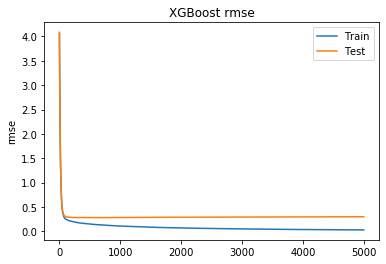

In [33]:
# retrieve performance metrics
results = xgb_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot rmse
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('rmse')
pyplot.title('XGBoost rmse')
pyplot.show()

In [36]:
eval_set = [(X_test, Y_test)]
xgb_model.fit(X_train, Y_train, early_stopping_rounds=3000, eval_metric="rmse", eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:4.08601
Will train until validation_0-rmse hasn't improved in 3000 rounds.
[1]	validation_0-rmse:3.85123
[2]	validation_0-rmse:3.63318
[3]	validation_0-rmse:3.41309
[4]	validation_0-rmse:3.22267
[5]	validation_0-rmse:3.02849
[6]	validation_0-rmse:2.84733
[7]	validation_0-rmse:2.69217
[8]	validation_0-rmse:2.54869
[9]	validation_0-rmse:2.39874
[10]	validation_0-rmse:2.25743
[11]	validation_0-rmse:2.12588
[12]	validation_0-rmse:2.00342
[13]	validation_0-rmse:1.88919
[14]	validation_0-rmse:1.78137
[15]	validation_0-rmse:1.68171
[16]	validation_0-rmse:1.58817
[17]	validation_0-rmse:1.50081
[18]	validation_0-rmse:1.41868
[19]	validation_0-rmse:1.34293
[20]	validation_0-rmse:1.27979
[21]	validation_0-rmse:1.2108
[22]	validation_0-rmse:1.14913
[23]	validation_0-rmse:1.09942
[24]	validation_0-rmse:1.04425
[25]	validation_0-rmse:0.993348
[26]	validation_0-rmse:0.952871
[27]	validation_0-rmse:0.915863
[28]	validation_0-rmse:0.874947
[29]	validation_0-rmse:0.835395
[30]	vali

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.646836, gamma=0,
             importance_type='gain', learning_rate=0.063926, max_delta_step=0,
             max_depth=13, min_child_weight=37, missing=None, n_estimators=5000,
             n_jobs=4, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=17.491806,
             scale_pos_weight=1, seed=None, silent=None, subsample=0.931488,
             verbosity=1)

In [37]:
# On avait :
#0.285881 sur le "test" avec labels_encoding + les 2 nouvelles variables 

# Maintenant on  : 0.280691
results['validation_1']['rmse'][426]

0.280691

In [ ]:
Le early stopping donne : n_estimators = 426

In [170]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,reg_lambda,RMSE_train,RMSE_test
42,0.665492,0.056283,15,426,0.581242,5,16.220194,[0.09988858992115984],[0.28181794294177925]


In [239]:
df_result_models[df_result_models["RMSE_test"]  == df_result_models["RMSE_test"].min()[0]]

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,min_child_weight,reg_lambda,RMSE_train,RMSE_test
54,0.540918,0.038891,16,459,0.788663,18,16.23938,[0.13654281849664168],[0.2775537240915111]


In [240]:
%%time

learning_rate_init = 0.038891
n_estimators_init = 459

factor_trick = range(1,10)

for each in factor_trick:
    print ("Learning rate",learning_rate_init/each,"N_estimators", n_estimators_init*each)
    xgb_model = xgb.XGBRegressor(
            colsample_bytree = 0.540918,
            learning_rate = learning_rate_init/each,
            max_depth = 16,
            # n_estimators = 438,
            n_estimators = n_estimators_init*each,
            subsample = 0.788663,
            n_jobs = 4,
            # min_child_weight = 37,
            # min_child_weight = 5,
            min_child_weight = 18,
            reg_lambda = 16.23938,
            # random_state = 25,656,899
            # random_state = 899,
            objective="reg:squarederror")
            # eval_metric = "rmse"

    xgb_model.fit(X_train, Y_train)

    predicted_values = xgb_model.predict(X_train)
    # print ("predicted_values", predicted_values)
    predicted_values = np.expand_dims(predicted_values, axis=1)
    RMSE_train_value = np.sqrt(np.mean((predicted_values - Y_train.values)**2, axis=0))
    # print("le score RMLSE sur le training set vaut : {}".format(RMSE))

    predicted_values = xgb_model.predict(X_test)
    predicted_values = np.expand_dims(predicted_values, axis=1)
    RMSE_test_value = np.sqrt(np.mean((predicted_values - Y_test.values)**2, axis=0))

    print (RMSE_test_value,RMSE_test_value - RMSE_train_value)

Learning rate 0.038891 N_estimators 459
[0.27755132] [0.14100789]
Learning rate 0.0194455 N_estimators 918
[0.27815343] [0.14203028]
Learning rate 0.012963666666666667 N_estimators 1377
[0.2770279] [0.14058389]
Learning rate 0.00972275 N_estimators 1836
[0.27704559] [0.1415027]
Learning rate 0.007778200000000001 N_estimators 2295
[0.27683253] [0.14118191]
Learning rate 0.006481833333333333 N_estimators 2754
[0.27651811] [0.1404806]
Learning rate 0.005555857142857143 N_estimators 3213
[0.27631764] [0.14053162]
Learning rate 0.004861375 N_estimators 3672
[0.27635575] [0.14095978]
Learning rate 0.004321222222222223 N_estimators 4131
[0.27643149] [0.14098646]
CPU times: user 15min 24s, sys: 7.31 s, total: 15min 31s
Wall time: 4min 4s


In [ ]:
#MEILLEUR MODELE:
#Learning rate 0.007798166666666666 N_estimators 2628
MEILLEUR MODELE:
Learning rate 0.031963 N_estimators 852 avec 
RMSE_test_value = 0.27872983
RMSE_test_value - RMSE_train_value= 0.11824964

Cette fois: avec variables CO_hour_int + CO_hour "binnée" (CO_hour_mean_encoding)
Learning rate 0.007035375 N_estimators 3408
RMSE_test_value = 0.27731468
RMSE_test_value - RMSE_train_value= 0.17846562

In [ ]:
MEILLEUR MODELE: On a oublié les tendances + NN_soleil !
et avec variables CO_hour_int + CO_hour "collapsée" + soleil et temp binnées
Learning rate 0.005555857142857143 N_estimators 3213
RMSE_test_value = 0.27631764
RMSE_test_value - RMSE_train_value= 0.14053162

In [ ]:
On relance
avec différents random_state = []
+ soumission

In [241]:
%%time

# learning_rate_value = 0.031963  
# n_estimators_value = 852

# learning_rate_value = 0.007035375  
# n_estimators_value = 3408

learning_rate_value = 0.005555857142857143 
n_estimators_value = 3213
random_states = [25,656,899]

for each in random_states:
    print ("Random state =", each)
    xgb_model = xgb.XGBRegressor(
        
            colsample_bytree = 0.665492,
            learning_rate = learning_rate_value,
            max_depth = 15,
            n_estimators = n_estimators_value,
            subsample = 0.581242,
            n_jobs = 4,
            # min_child_weight = 37,
            min_child_weight = 5,
            reg_lambda = 16.220194,
                
            # random_state = 25,656,899
            random_state = each,
            objective="reg:squarederror")
            # eval_metric = "rmse"

    xgb_model.fit(X_train, Y_train)

    predicted_values = xgb_model.predict(X_train)
    # print ("predicted_values", predicted_values)
    predicted_values = np.expand_dims(predicted_values, axis=1)
    RMSE_train_value = np.sqrt(np.mean((predicted_values - Y_train.values)**2, axis=0))
    # print("le score RMLSE sur le training set vaut : {}".format(RMSE))

    predicted_values = xgb_model.predict(X_test)
    predicted_values = np.expand_dims(predicted_values, axis=1)
    RMSE_test_value = np.sqrt(np.mean((predicted_values - Y_test.values)**2, axis=0))

    print (RMSE_test_value,RMSE_test_value - RMSE_train_value)

Random state = 25
[0.27542398] [0.17253708]
Random state = 656
[0.27536249] [0.17253779]
Random state = 899
[0.27562494] [0.17302907]
CPU times: user 8min 35s, sys: 1.51 s, total: 8min 37s
Wall time: 2min 11s


In [41]:
%%time

# Modèle précédent
# learning_rate_value = 0.007798166666666666 
# n_estimators_value = 2628

learning_rate_value = 0.031963  
n_estimators_value = 852

xgb_model = xgb.XGBRegressor(
        colsample_bytree = 0.646836,
        learning_rate = learning_rate_value,
        max_depth = 13,
        # n_estimators = 438,
        n_estimators = n_estimators_value,
        subsample = 0.931488,
        n_jobs = 4,
        min_child_weight = 37,
        reg_lambda = 17.491806,
        objective="reg:squarederror")
        # eval_metric = "rmse"

xgb_model.fit(X_train, Y_train)

predicted_values = xgb_model.predict(X_train)
# print ("predicted_values", predicted_values)
predicted_values = np.expand_dims(predicted_values, axis=1)
RMSE_train_value = np.sqrt(np.mean((predicted_values - Y_train.values)**2, axis=0))
# print("le score RMLSE sur le training set vaut : {}".format(RMSE))

predicted_values = xgb_model.predict(X_test)
predicted_values = np.expand_dims(predicted_values, axis=1)
RMSE_test_value = np.sqrt(np.mean((predicted_values - Y_test.values)**2, axis=0))

print (RMSE_test_value,RMSE_test_value - RMSE_train_value)

[0.27872983] [0.11824964]
CPU times: user 23.4 s, sys: 118 ms, total: 23.5 s
Wall time: 6.03 s


#### SAUVEGARDE avec xgb_model

In [243]:
from sklearn.externals import joblib
# pour le save
# joblib.dump(xgb_model, "xgb_labels_encoding_improved.pkl", compress=9)
# joblib.dump(xgb_model, "xgb_ordinal_encoding_improved.pkl", compress=9)
# joblib.dump(xgb_model, "xgb_with_hour_binned_improved.pkl", compress=9)

joblib.dump(xgb_model, "xgb_with_all_variables_hour_soleil_temp_binned_improved.pkl", compress=9)
# pour le reload
# mymodel = joblib.load("xgb_mean_encoding_1.pkl")

['xgb_with_all_variables_hour_soleil_temp_binned_improved.pkl']

## SAUVEGARDE avec xgb_model

In [254]:
df_to_predict = pd.read_pickle("../data/df_test_kaggle_cv_o_n_all_variables.pkl") 
df_to_predict.shape

(6493, 50)

In [255]:
list(df_to_predict)

['CN_school',
 'CN_soleilQ',
 'CN_tendance_1Q',
 'CN_tendance_2Q',
 'CO_atempQ',
 'CO_day',
 'CO_holiday',
 'CO_humidityQ',
 'CO_month',
 'CO_season',
 'CO_tempQ',
 'CO_weather',
 'CO_windspeedQ',
 'CO_workingday',
 'NN_soleil',
 'NN_tendance_1',
 'NN_tendance_2',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'S_casual',
 'S_casualQ',
 'S_rateregis',
 'S_rateregisQ',
 'S_registered',
 'S_registeredQ',
 'datetime',
 'CO_hour',
 'CO_year',
 'CO_day_labels_encoding',
 'CO_month_labels_encoding',
 'CO_season_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_hour_labels_encoding',
 'CO_year_labels_encoding',
 'CO_hour_int',
 'CO_hour_mean_encoding',
 'CO_month_mean_encoding',
 'CO_day_mean_encoding',
 'CO_hour_ordinal_encoding',
 'CO_month_ordinal_encoding',
 'CO_day_ordinal_encoding',
 'CO_weather_ordinal_encoding',
 'CO_season_ordinal_encoding',
 'CO_year_ordinal_encoding',
 'CN_type_of_day',
 'CN_week_end',
 'NN_soleil_binned',
 'NO_temp_binned']

In [256]:
var_to_keep = ['datetime',
    'CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_temp_binned',           
 'NO_windspeed',
 'NN_soleil',
 'NN_soleil_binned',
 'NN_tendance_1',
 'NN_tendance_2',
 'CO_hour_int',              
 'CO_hour_mean_encoding',
 'CO_month_labels_encoding',
 'CO_day_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_season_labels_encoding',
 'CO_year_labels_encoding',
 'CN_type_of_day',
 'CN_week_end']

In [177]:
var_to_keep = ['datetime',
 'CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'CO_hour_int',
 'CO_hour_mean_encoding',
 'CO_month_labels_encoding',
 'CO_day_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_season_labels_encoding',
 'CO_year_labels_encoding',
 'CN_type_of_day',
 'CN_week_end']

In [53]:
var_to_keep = ['datetime',
 'CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'CO_hour_ordinal_encoding',
 'CO_month_ordinal_encoding',
 'CO_day_ordinal_encoding',
 'CO_weather_ordinal_encoding',
 'CO_season_ordinal_encoding',
 'CO_year_ordinal_encoding',
 'CN_type_of_day',
 'CN_week_end']

In [257]:
df_to_predict = df_to_predict[var_to_keep]

In [258]:
df_to_predict.sample(n=5)

,datetime,CN_school,NO_atemp,NO_humidity,NO_temp,NO_temp_binned,NO_windspeed,NN_soleil,NN_soleil_binned,NN_tendance_1,NN_tendance_2,CO_hour_int,CO_hour_mean_encoding,CO_month_labels_encoding,CO_day_labels_encoding,CO_weather_labels_encoding,CO_season_labels_encoding,CO_year_labels_encoding,CN_type_of_day,CN_week_end
2402,2011-10-20 15:00:00,0,23.485,51,19.68,1,30.0026,32.525681,2,1.155115,292,15,3,10,4,1,1,0,0,0
3529,2012-02-20 19:00:00,1,15.910,34,13.94,1,15.0013,-2.608731,2,1.208349,415,19,7,3,1,0,2,1,2,0
5293,2012-08-26 09:00:00,1,31.820,79,27.88,2,16.9979,27.735084,2,1.051918,603,9,6,1,3,0,0,1,1,1
5991,2012-11-21 23:00:00,0,17.425,61,13.12,1,0.0000,-59.118025,0,1.076335,690,23,1,9,6,0,1,1,0,0
3713,2012-02-28 12:00:00,0,17.425,34,14.76,1,8.9981,39.493282,2,1.208349,423,12,3,3,5,0,2,1,0,0


In [259]:
# Ajout de la prédiction au dataframe "df_to_predict"
df_temp = df_to_predict.drop("datetime", axis = 1)
log_pred = np.expand_dims(xgb_model.predict(df_temp), axis=1)

# print (log_pred)

df_to_predict["count"] = list((np.exp(log_pred) - 1)[:,0])
# df_to_predict[["datetime", "count"]].to_csv("../data/submission_to_send/pred_xgboost_labels_encoding_improved.csv", index= False)
# df_to_predict[["datetime", "count"]].to_csv("../data/submission_to_send/pred_xgboost_ordinal_encoding_improved.csv", index= False)
# df_to_predict[["datetime", "count"]].to_csv("../data/submission_to_send/pred_xgboost_hour_binned_improved.csv", index= False)
df_to_predict[["datetime", "count"]].to_csv("../data/submission_to_send/pred_xgboost_all_hour_soleil_temp_binned_improved.csv", index= False)


In [ ]:
KAGGLE SCORE A BATTRE = 0.40892

### II Méthode randomized cross validation

In [ ]:
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

In [74]:
# df_for_cv_interaction_and_dummies = pd.read_pickle("df_for_cv_o_n_sk_encoded.pkl")

# OU
df_for_cv_interaction_and_dummies = pd.read_pickle("df_for_cv_interaction_and_dummies.pkl")

all_var_x = [each for each in list(df_for_cv_interaction_and_dummies) if each != "count" and each != "datetime"]

# df_for_cv_interaction_and_dummies.shape
X_train = df_for_cv_interaction_and_dummies[all_var_x]
Y_train = df_for_cv_interaction_and_dummies[["count"]]

# Calcul des Y = log(Y + 1)
Y_train['log_count'] = Y_train['count'].map(lambda x: np.log1p(x))
Y_train = Y_train.drop("count", axis = 1)

/home/osboxes/anaconda3/envs/data/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [75]:
X_train.shape

(10886, 6429)

In [76]:
features_names = list(X_train)
new_features_names = [re.sub("\[|\]|\<|\>",'',line) for line in features_names]
X_train.columns = new_features_names

features_names = list(X_test)
new_features_names = [re.sub("\[|\]|\<|\>",'',line) for line in features_names]
X_test.columns = new_features_names

In [77]:
params = {
    "colsample_bytree": uniform(0.3, 0.7),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.4, 0.6),  # c'est quoi ?
    "reg_alpha": uniform(0, 0.05)
}

# n_iter = 200 avant
search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=85, cv=3, verbose=1, n_jobs=2, return_train_score=True)

search.fit(X_train, Y_train)

Fitting 3 folds for each of 85 candidates, totalling 255 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: 